In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots

**¿Qué es un Boxplot?**

Un boxplot es una herramienta visual que nos permite resumir como distribuyen los datos. 

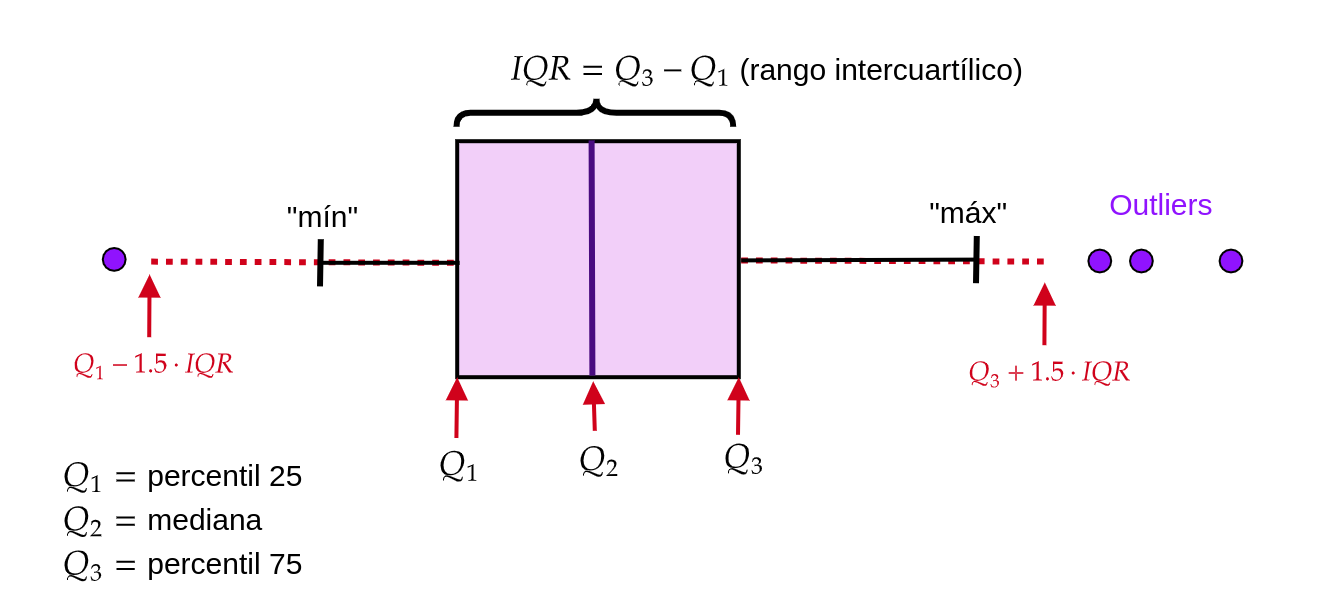

## Uso e interpretación de un boxplot

Vamos a estudiar algunas situaciones hipotéticas que nos servirán para entender cuando utilizar un boxplot, y como se interpreta. **Ojo**: en esta parte de la clase, el objetivo es entender y analizar que es un boxplot, así que no se preocupen si no entienden el código que genera los boxplot (eso lo veremos en la segunda parte).

In [2]:
# Generamos datos de una distribución exponencial
np.random.seed(1)
df = pd.DataFrame(np.random.exponential(0.3, 100), columns=["Datos"])
df.describe() # Claramente notamos asimetría en estos datos (compare la mediana con el valor máximo)

,Datos
count,100.000000
mean,0.284472
std,0.274850
min,0.000034
25%,0.070656
50%,0.191117
75%,0.383775
max,1.349193


## Estudiando la dispersión en los datos

El siguiente gráfico nos muestra los puntos, y el boxplot asociado a ellos. Algunas cosas por notar son que: 

1. Si miraramos solo los puntos de nuestra muestra, sería difícil indentificar la mediana, los cuantiles, e incluso outliers. 
2. El Boxplot nos entrega esta información rápidamente.

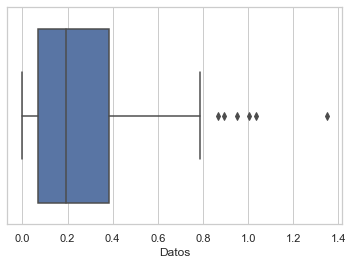

In [3]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Datos"])

Note que en la los bigotes de la izquiera son más cortos debido a la asimetría de nuestros datos. También podemos hacer un gráfico que nos muestra los puntos.

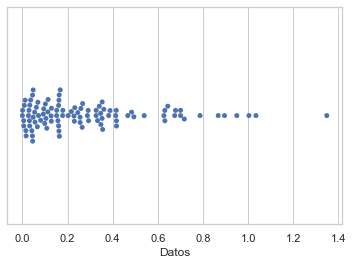

In [4]:
ax = sns.swarmplot(x=df["Datos"])

Y podemos combinar ambos gráficos.

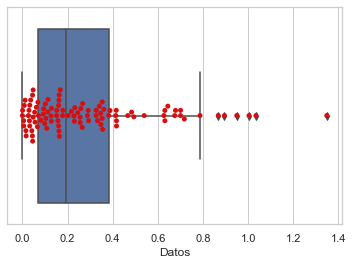

In [5]:
ax = sns.boxplot(x=df["Datos"])
# Cambiamos el color de los puntos ingresando el valor de un color rojo en hexadecimal
ax = sns.swarmplot(x=df["Datos"], color="#d60e0e")

## Comparación de varios grupos

Un gráfico de Boxplot además es una excelente herramienta para comparar dos o más grupos de datos en términos de su dispersión.

In [6]:
np.random.seed(1)
n1 = 100
n2 = 50
n3 = 90

d1 = np.random.exponential(0.3, n1)
d2 = np.random.normal(2, 0.5, n2)
d3 = np.random.gamma(1, 0.7, n3)

tipo = ["T1"]*n1 + ["T2"]*n2 + ["T3"]*n3
valor = np.concatenate((d1, d2, d3))

D = {"Valor": valor, "Tipo": tipo}
df = pd.DataFrame(D)
df.head()

,Valor,Tipo
0,0.161882,T1
1,0.382238,T1
2,0.000034,T1
3,0.108004,T1
4,0.047613,T1


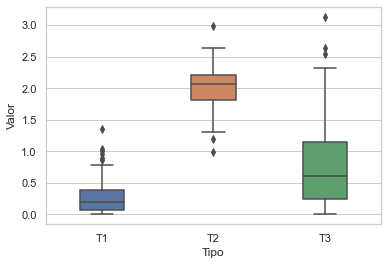

In [7]:
# Estamos cambiando el ancho que viene por defecto
ax = sns.boxplot(x=df["Tipo"], y=df["Valor"], width=0.4)

## Los boxplot nos podrían engañar

Para distribuciones bimodales, o multimodales, los boxplot no parecen ser una buena opcion para observar este tipo de comportamiento. Veamos un ejemplo.

In [8]:
np.random.seed(1)
n1 = 100
n2 = 150

d1 = np.random.normal(-1, 0.5, n1)
d2 = np.random.normal(6, 1, n2)


tipo = ["T1"]*(n1 + n2)
valor = np.concatenate((d1, d2))

d = {"Valor": valor, "Tipo": tipo}
df = pd.DataFrame(d)
df.head()

,Valor,Tipo
0,-0.187827,T1
1,-1.305878,T1
2,-1.264086,T1
3,-1.536484,T1
4,-0.567296,T1


Aquí vamos a notar que si solo miramos al boxplot, perdemos la información sobre la bimodalidad de nuestros datos.

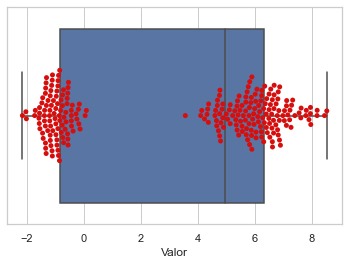

In [9]:
ax = sns.boxplot(x=df["Valor"])
ax = sns.swarmplot(x=df["Valor"], color="#d60e0e")

# Construcción de un boxplot

En este ejemplo vamos a cargar la base de datos **MXvideos**, que contiene información de videos de youtube vistos en México (obtenida desde [este link](https://www.kaggle.com/datasnaek/youtube-new/version/115?select=MXvideos.csv)).

Para cargar la base de datos, usamos el método `read_csv` de Pandas, pero ojo, esta base de datos al ser de México, tiene muchos tíldes y ñ's.

In [10]:
MXvid = pd.read_csv("MXvideos.csv", sep=",", header=0, engine="python")

In [11]:
#Procedemos a visualizar los datos utilizando la función head()
MXvid.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,Capítulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canción del principio se llama “Este espíri...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...


Utilizamos el comando *describe* para obtener los estadísticos de resumen básicos de las variables continuas.

In [12]:
# Utilizando la función describe podemos obtener estadísticos de resumen básicos

MXvid.describe()

,category_id,views,likes,dislikes,comment_count
count,40451.000000,4.045100e+04,4.045100e+04,4.045100e+04,40451.000000
mean,21.003140,3.423820e+05,1.586184e+04,7.471604e+02,2039.660008
std,5.878995,1.714691e+06,8.108987e+04,1.095358e+04,13938.031797
min,1.000000,1.570000e+02,0.000000e+00,0.000000e+00,0.000000
25%,20.000000,1.681300e+04,2.990000e+02,1.700000e+01,42.000000
50%,24.000000,5.697300e+04,1.246000e+03,6.300000e+01,196.000000
75%,24.000000,2.068940e+05,7.226000e+03,2.670000e+02,885.000000
max,43.000000,1.009124e+08,4.470923e+06,1.353667e+06,905925.000000


Lo primero que notamos es que existe una gran diferencia entre el tercer cuantil (correspondiente al 75%) y el máximo en todas las variables. Entonces, nos va a convenir tomar una transformación logaritmo a los datos para construir un boxplot. Esta es una técnica habitual en _Data Science_ que cambia la escala de nuestros datos pero que mitiga el efecto de la presencia de _outliers_.

In [13]:
# Vamos a seleccionar algunas columnas del dataset
MXvid2 = MXvid[["views", "likes", "dislikes", "comment_count"]]

# A cada valor le vamos a sumar 1 y vamos a sacar su logaritmo
# Sumamos 1 en caso de queu haya un valor igual a 0
MXvid2 = np.log(MXvid2 + 1)
MXvid2.describe()

,views,likes,dislikes,comment_count
count,40451.000000,40451.000000,40451.000000,40451.000000
mean,11.046517,7.229152,4.278247,5.250793
std,1.741351,2.341510,1.983428,2.231078
min,5.062595,0.000000,0.000000,0.000000
25%,9.729967,5.703782,2.890372,3.761200
50%,10.950350,7.128496,4.158883,5.283204
75%,12.239967,8.885579,5.590987,6.786717
max,18.429763,15.313106,14.118329,13.716713


## Boxplot básico

Seguimos los siguientes pasos para graficar un **Boxplot** utilizando `seaborn`.

1. Debemos importar la librería (ya lo hicimos arriba con el alias `sns`).
2. Seleccionamos el DataFrame para visualizar, que en este caso es `MXvid2`.
3. Señalamos la variabla que queremos en el eje y.


Puedes encontrar más información sobre boxplots en `seaborn` [aquí](https://plotnine.readthedocs.io/en/stable/api.html#).

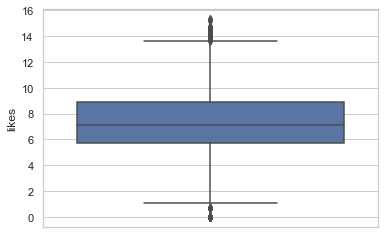

In [14]:
ax = sns.boxplot(y=MXvid2["likes"])

También lo podemos instanciar como un gráfico horizontal, pasando la columna a visualizar en el eje `x`.

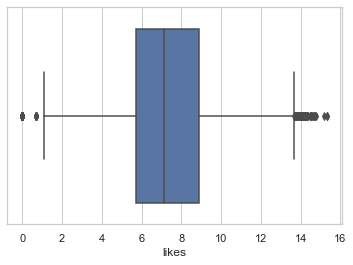

In [15]:
ax = sns.boxplot(x=MXvid2["likes"])

Además, podemos aprovechar de comprobar cómo se veía el gráfico sin la transformación logarítmica.

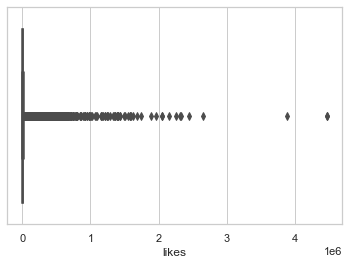

In [16]:
ax = sns.boxplot(x=MXvid["likes"])

¿Qué puedes opinar de la transformación realizada?

## Título, ejes y función theme


Recordemos que podemos cambiar el tema de nuestro gráfico con la función `sns.set_style(...)`. El estilo actual es `whitegrid`, pero puedes encontrar más estilos y formas de customizar el gráfico [aquí](https://seaborn.pydata.org/tutorial/aesthetics.html).

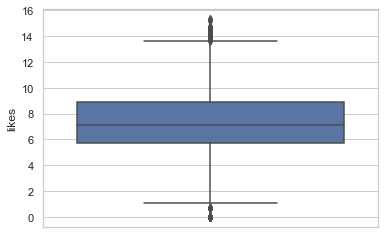

In [17]:
# Puedes probar otros temas, como ticks, dark o white
sns.set_style("whitegrid")
ax = sns.boxplot(y=MXvid2["likes"])

Y ahora vamos a ingresar un título y nombres de los ejes.

Text(0, 0.5, 'Log-Likes')

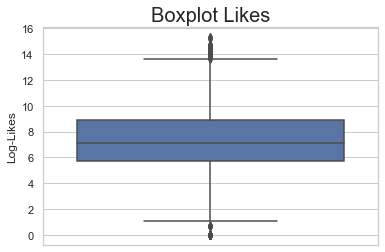

In [18]:
ax = sns.boxplot(y=MXvid2["likes"])

# Seteamos el título
ax.set_title("Boxplot Likes", fontsize=20)

# El nombre del eje y
ax.set_ylabel("Log-Likes")

Como podrás suponer, hay un montón de parámetros para customizar al gráfico, como por ejemplo el nombre dele eje $x$ con la función `set_xlabel`. Recuerda además que hay un tema XKCD para hacer que tenga formato de comic.

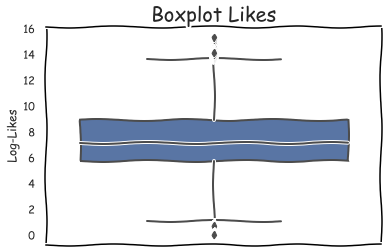

In [19]:
with plt.xkcd():
    ax = sns.boxplot(y=MXvid2["likes"])

    # Seteamos el título
    ax.set_title("Boxplot Likes", fontsize=20)

    # El nombre del eje y
    ax.set_ylabel("Log-Likes")

## Editando un boxplot

Recordemos que hay otros parámetros que podemos entregar para customizar nuestro boxplot. Veamos algunos ejemplos.

Text(0, 0.5, 'Log-Likes')

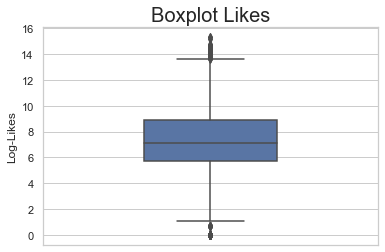

In [20]:
# Podemos ajustar el ancho
ax = sns.boxplot(y=MXvid2["likes"], width=0.4)

# Seteamos el título
ax.set_title("Boxplot Likes", fontsize=20)

# El nombre del eje y
ax.set_ylabel("Log-Likes")

Text(0, 0.5, 'Log-Likes')

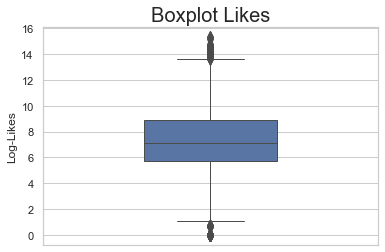

In [21]:
# Además podemos ajustar el tamaño de los puntos (fliersize) 
# y el grosor de la línea (linewidth)
ax = sns.boxplot(y=MXvid2["likes"], width=0.4, fliersize=8, linewidth=1)

# Seteamos el título
ax.set_title("Boxplot Likes", fontsize=20)

# El nombre del eje y
ax.set_ylabel("Log-Likes")

Text(0, 0.5, 'Log-Likes')

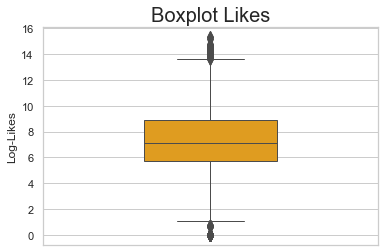

In [22]:
# Y podemos setear el color
# Recordemos que podemos pasar el valor del color en hexadecimal
ax = sns.boxplot(y=MXvid2["likes"], color="orange", width=0.4, fliersize=8, linewidth=1)

# Seteamos el título
ax.set_title("Boxplot Likes", fontsize=20)

# El nombre del eje y
ax.set_ylabel("Log-Likes")

## Múltiples boxplots

En algunas ocaciones, será de interés comparar el valor de una variable continua para múltiples categorias, ó multiples variables continuas que viven en la misma escala. Por ejemplo:

1. **Sí** tiene sentido comparar directamente (en el mismo boxplot) el número de likes y dislikes.
2. **No** tiene sentido comparar en el mismo boxplot el número de likes y el dinero invertido en la producción ya que viven en escalas de valores distintas.

Text(0, 0.5, 'Log-Values')

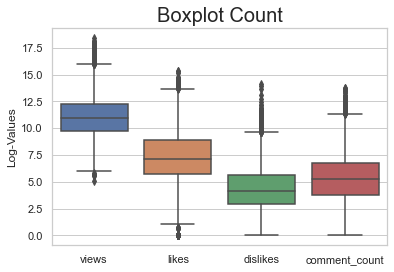

In [23]:
# Ahora usamos data para pasar el dataframe completo, en vez de x e y
ax = sns.boxplot(data=MXvid2)

# Seteamos el título
ax.set_title("Boxplot Count", fontsize=20)

# El nombre del eje y
ax.set_ylabel("Log-Values")

Si queremos modificar los colores, podemos hacerlo como se señala a continuación.

Text(0, 0.5, 'Log-Values')

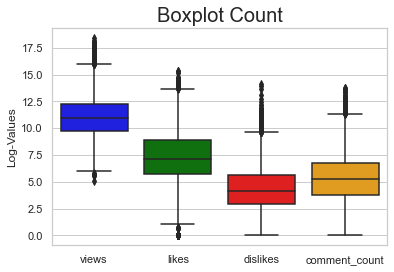

In [24]:
# Pasamos una lista de colores para cada boxplot en el argumento palette
ax = sns.boxplot(data=MXvid2, palette=["blue", "green", "red", "orange"])

# Seteamos el título
ax.set_title("Boxplot Count", fontsize=20)

# El nombre del eje y
ax.set_ylabel("Log-Values")

Por supuesto, podríamos pasar valores hexadecimales como lo hicimos antes. Sin embargo, `seaborn` tiene sus propias paletas de colores, y en general es buena idea partir por ahí. Puedes averiguar más de las paletas de colores de `seaborn` [aquí](https://seaborn.pydata.org/tutorial/color_palettes.html).

Text(0, 0.5, 'Log-Values')

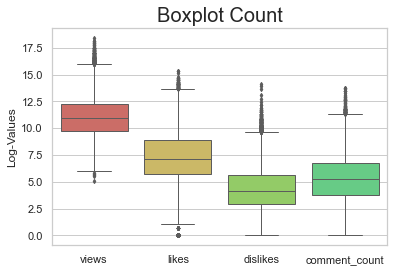

In [25]:
# Pasamos una lista de colores para cada boxplot en el argumento palette
ax = sns.boxplot(data=MXvid2, palette=sns.color_palette("hls", 8), linewidth=1, fliersize=3)

# Seteamos el título
ax.set_title("Boxplot Count", fontsize=20)

# El nombre del eje y
ax.set_ylabel("Log-Values")

## Separación por una segunda variable categórica.

En esta sección consideramos graficar las variables respectivas, pero además vamos a hacer grupos por año. Este tipo de visualizaciones es bastante común, por lo que vamos a ver cómo realizarla. 

Para hacer esto primero tenemos que extraer el año de las fechas, para luego juntar eso con nuestro _dataset_ que contiene solo las variables de interés.

In [26]:
MXvid_date = MXvid["trending_date"].copy()
for i in range(MXvid.shape[0]):
    MXvid_date.iloc[i] = MXvid_date.iloc[i].split(".")[0]
MXvid_date

0        17
1        17
2        17
3        17
4        17
         ..
40446    18
40447    18
40448    18
40449    18
40450    18
Name: trending_date, Length: 40451, dtype: object

In [27]:
MXvid2 = MXvid2.join(MXvid_date)
MXvid2

,views,likes,dislikes,comment_count,trending_date
0,12.644750,8.338784,5.891644,7.515889,17
1,11.561458,5.605802,5.164786,5.913503,17
2,11.820888,9.220885,5.587249,6.410175,17
3,11.473706,5.937536,5.147494,5.342334,17
4,13.122295,10.964433,6.525030,8.913147,17
...,...,...,...,...,...
40446,13.389509,11.091941,6.306275,8.249836,18
40447,11.709109,8.177235,4.077537,6.198479,18
40448,9.551658,6.289716,1.945910,4.510860,18
40449,10.038849,4.553877,2.484907,1.386294,18


Para separar por una segunda variable categórica (en este caso `trending_date`), vamos a usar la función `catplot`. Para señalar la segunda categoría, podemos usar el argumento `col` de `seaborn`. Además, tenemos que señalar

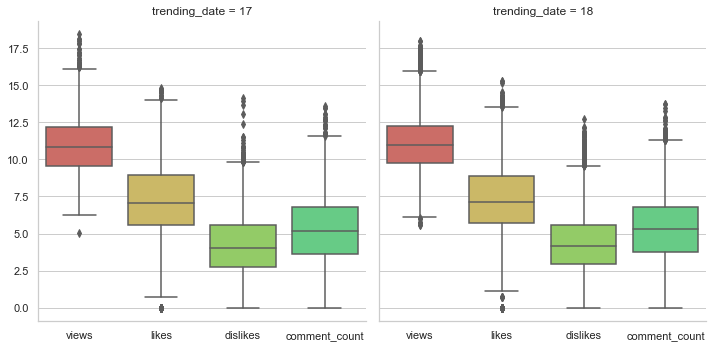

In [28]:
ax = sns.catplot(
    data=MXvid2, col="trending_date",
    palette=sns.color_palette("hls", 8), kind="box"
)

# El nombre del eje y
ax.add_legend()

Una última opción puede ser dibujar lado a lado los valores para el 2017 y 2018. Para esto vamos a tener que haceer "colapsar" el _dataset_ con la función `melt`. Esta transformación toma (nombres de) columnas y las transforma en valores por fila. Esto permite usar las funciones de `boxplot` en vez de `catplot`.

In [33]:
MXvid2_melt = MXvid2.melt(
    id_vars=["trending_date"], 
    var_name="Type", 
    value_name="Value"
)

MXvid2_melt

,trending_date,Type,Value
0,17,views,12.644750
1,17,views,11.561458
2,17,views,11.820888
3,17,views,11.473706
4,17,views,13.122295
...,...,...,...
161799,18,comment_count,8.249836
161800,18,comment_count,6.198479
161801,18,comment_count,4.510860
161802,18,comment_count,1.386294


Como ahora nueustro _dataset_ se ve de esta forma, podemos hacer lo siguiuente:

1. Le indicamos con el argumento `data` cuál es nuestro DataFrame.
2. Le indicamos con el argumento `x` la columna por la que queremos que agrupe en el eje $x$. En este caso es el tipo entre "views", "likes", "dislikes" y "comment_count".
3. Le indicamos el valor del eje $y$ con el argumento `y`. En este caso es la columna "Value", ya que cada fila representa el conteo de la propiedad para algún video en un año determinado.

Text(0, 0.5, 'Log-Values')

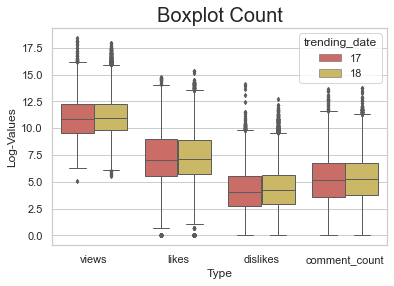

In [34]:
ax = sns.boxplot(
    x="Type", y="Value", data=MXvid2_melt, hue="trending_date",
    palette=sns.color_palette("hls", 8), linewidth=1, fliersize=3
)

# Seteamos el título
ax.set_title("Boxplot Count", fontsize=20)

# El nombre del eje y
ax.set_ylabel("Log-Values")

Quizás, es demasiado mostrar 4 pares de boxplot en un mismo gráfico. Por lo mismo, vamos a hacer cuatro subgráficos, con cada par en cada uno de ellos.

<AxesSubplot:xlabel='trending_date', ylabel='comment_count'>

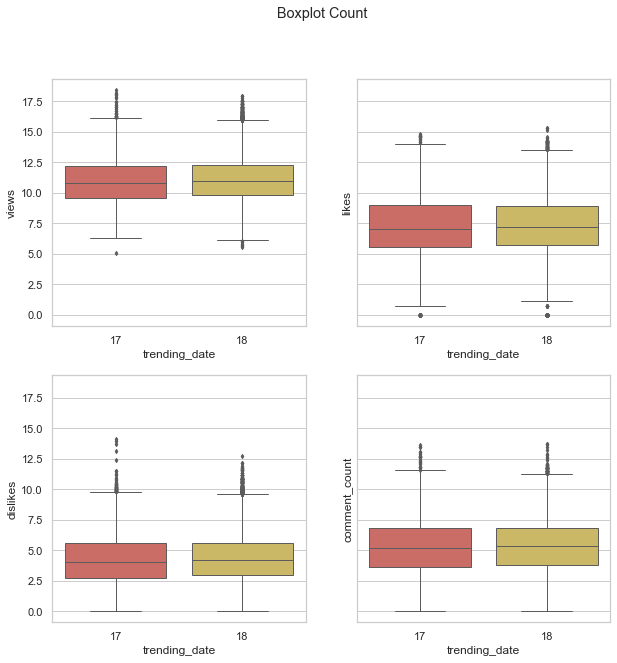

In [49]:
# Primero creamos 2 filas y 2 columnas con matplotlib
# sharey permite que compartan los límites del eje y
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(10,10))


# Agregamos el título
fig.suptitle('Boxplot Count')

# Guardamos en una variable cada uno de los subplots
ax_1 = axes[0, 0]
ax_2 = axes[0, 1]
ax_3 = axes[1, 0]
ax_4 = axes[1, 1]

# Hacemos cada uno de los boxplot y lo pasamos al subgrafo correspondiente con el argumento ax
# Vamos a usar el DataFrame MXvid2, y vamos a pedir la columna correspondiente en el eje y
# Y vamos a decir que x es el año, para que se separe en cada año

# Primer boxplot 
sns.boxplot(
    ax=ax_1, x="trending_date", y="views", data=MXvid2,
    palette=sns.color_palette("hls", 8), linewidth=1, fliersize=3
)

# Primer boxplot 
sns.boxplot(
    ax=ax_2, x="trending_date", y="likes", data=MXvid2,
    palette=sns.color_palette("hls", 8), linewidth=1, fliersize=3
)


# Primer boxplot 
sns.boxplot(
    ax=ax_3, x="trending_date", y="dislikes", data=MXvid2,
    palette=sns.color_palette("hls", 8), linewidth=1, fliersize=3
)


# Primer boxplot 
sns.boxplot(
    ax=ax_4, x="trending_date", y="comment_count", data=MXvid2,
    palette=sns.color_palette("hls", 8), linewidth=1, fliersize=3
)